In this notebook I show how to use Sklearn in odrer to aproximate function of degree 3.

In [1]:
from sklearn import linear_model

%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 

### Constants

In [2]:
DATA_NUM = 300
DATA_DEGREE = 3

### Generate problem

In [3]:
def generate_polynomial_regression_problem(samples_num, degree):
    """Generates 'samples_num' points that can be easily generalized and fit with usage of
    Polynomial Regression algorithm.
    
    Arguments:
    ---------
    samples_num: int
        Numer of points that should be generated.
    degree: int
        The power of the polynomial.
    """
    
    def _polynomial_function(x_values, degree, function_param_min, function_param_max):
        """For each value in list 'x_values' returns value which corresponds to equation:
            
               f(x) = param[0] + param[1] * x + param[2] * x^2 + ... param[degree] + x^degree 
            
           where 'param' is a random float number from range <function_param_min, function_param_max).
        """
        function_parameters = list()

        for i in range(1, degree + 1):
            function_parameters.append((np.random.uniform(function_param_min, function_param_max), i))

        y_values = list()
        for x in x_values:
            y = 0
            for parameter in function_parameters:
                y += parameter[0] * np.power(x, parameter[1])
            y_values.append(y)

        return y_values
    
    def _add_noise(values):
        """Adds noise to each value in list 'values' according to equation:
        
               value += value * random value from range (-0.1, 0.1>
        """
        noised_values = list()
        for val in values:
            noised_val = val + np.max(values) * np.random.uniform(-0.1, 0.1)
            noised_values.append(noised_val)

        return noised_values
    
    x_values = [np.random.uniform(-10, 10) for _ in range(samples_num)]
    
    y_values = _polynomial_function(x_values, degree, -15 , 15)
    y_values = _add_noise(y_values)
    
    return np.array(x_values).reshape(-1, 1), np.array((y_values)).reshape(-1, 1)

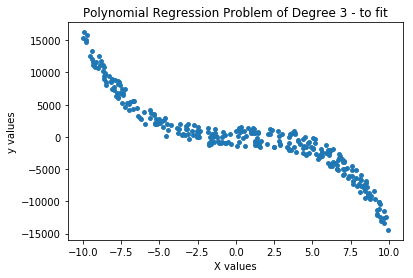

In [4]:
# Generating values 'X' and labels 'y'
X, y = generate_polynomial_regression_problem(DATA_NUM, DATA_DEGREE)

# Presenting generated data
plt.scatter(X, y, s=15)
plt.title("Polynomial Regression Problem of Degree 3 - to fit")
plt.xlabel("X values")
plt.ylabel("y values")
plt.show()

### Polynomial Regression - by sci-kit learn

In order to make sklearn predict polynomial function for single feature it is necessary to reshape it [1, degree] shape and raise X value to the power - respectively to it's position.

In [5]:
X_pow = np.column_stack([X**d for d in range(0, DATA_DEGREE + 1)])

In [6]:
for i, x_row in enumerate(X_pow):
    if i == 5:
        break;
        
    print("Input " + str(i) + ": " + str(x_row))

Input 0: [  1.           3.62606405  13.14834046  47.6767246 ]
Input 1: [   1.            8.81012242   77.61825708  683.82634698]
Input 2: [  1.           3.67652238  13.5168168   49.69487943]
Input 3: [  1.           4.61212109  21.27166096  98.10747618]
Input 4: [  1.          -4.41161959  19.46238738 -85.8606494 ]


LinearRegression object of Sklearn is capable of creating Polynomial functions

In [7]:
regression = linear_model.LinearRegression()

Fitting to generated data

In [8]:
regression.fit(X_pow, y)

/Users/F1sherKK/.pyenv/versions/3.6.1/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Training results

In [9]:
# Trained weights of Polynomial Model - w0 + w1 * x + w2 * x^2 + w3 * x^3
print("Weights: " + str(regression.intercept_) + str(regression.coef_))

Weights: [ 56.33286749][[  0.         -25.40112342   7.93994597 -14.22316927]]


In [10]:
# Error - Mean Squared Errors
print("Minimized error value: " + str((1 / DATA_NUM) * np.mean((regression.predict(X_pow) - y) ** 2)))

Minimized error value: 2722.66537067


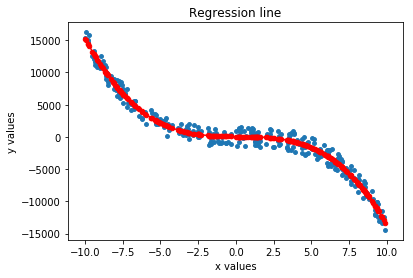

In [11]:
# Displaying dataset
plt.scatter(X, y, s=15)

# Displaying aproximated function
function_x = np.arange(np.min(X), np.max(X), 0.01).reshape(-1,1)
function_x_pow = np.column_stack([function_x**d for d in range(0, DATA_DEGREE + 1)])
plt.plot(function_x, regression.predict(function_x_pow), c="red")
plt.scatter(X, regression.predict(X_pow), s=20, c='red')

plt.title("Regression line")
plt.ylabel("y values")
plt.xlabel("x values")
plt.show()